## Analysing difference of Grid cell activation as a function of distance

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [4]:
def Lattice(l=1,l0=[0,0],t0=0,N=3):
    '''Return an array of x coordinates and y coordinates that create a hexagonal lattice
      of N^2 points of length l, rotated by theta t0 and displaced by l0  '''
    mlist = np.linspace(-N,N,2*N+1)
    nlist = np.linspace(-N,N,2*N+1)
    m,n = np.meshgrid(mlist,nlist)
    a0 = np.array([(3**0.5)/2,1/2]) *l
    b0 = np.array([(3**0.5)/2,-1/2]) *l
    # a = a0 + *l + l0[0]
    # b = np.array([3**0.5/2,-1/2]) *l + l0[1]

    # apply rotation
    theta = np.radians(t0)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    a,b = R@a0 + l0[0], R@b0 + l0[1]
    return np.outer(a,m.flatten()) + np.outer(b,n.flatten())

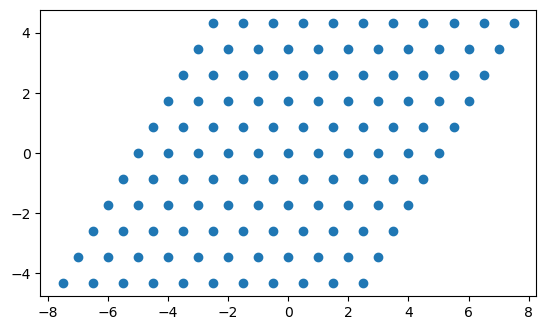

In [5]:
plt.scatter(*Lattice(l=1,t0=30,N=5))
# plt.set_aspect('equal', adjustable='box')
plt.axis('scaled')
plt.show()

The normal Gaussian is given by,
$$ \displaystyle g(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}\exp \left(-{\frac {1}{2}}{\frac {(x-\mu )^{2}}{\sigma ^{2}}}\right) $$

In [6]:
def GaussLattice(x,y,X,Y,s=1):
    ''' A function with periodic Gaussians centered at X,Y lattice'''
    exponent = (np.subtract.outer(X,x))**2  + (np.subtract.outer(Y,y))**2
    # print(exponent.shape)
    explat = np.exp(exponent / (-2*(s**2)))     # lattice of exponentials
    return np.sum(explat, axis=0)

In [7]:
X1,Y1 = Lattice(l=1,t0=0,N=10)
X2,Y2 = Lattice(l=1,t0=3,N=10)
X3,Y3 = Lattice(l=1,t0=10,N=10)

# print(X.shape,Y.shape)
xyrange = np.linspace(-5,5,100)
x,y = np.meshgrid(xyrange,xyrange)
Z1 = GaussLattice(x,y,X1,Y1,s=0.2)
Z2 = GaussLattice(x,y,X2,Y2,s=0.2)
Z3 = GaussLattice(x,y,X3,Y3,s=0.2)

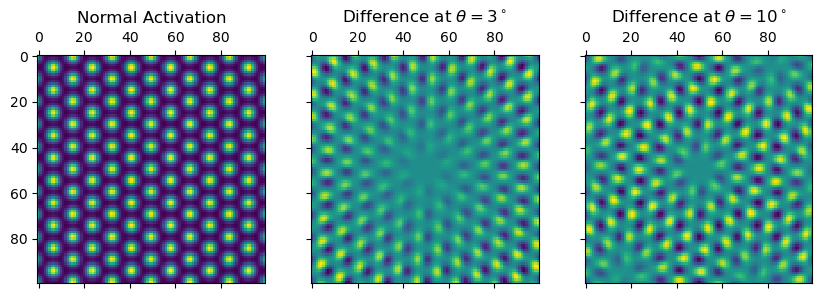

In [8]:
fig, ax = plt.subplots(1,3, figsize=(10,30), sharex=True, sharey=True)

ax[0].matshow(Z1)
ax[0].set_title("Normal Activation")

ax[1].matshow(Z2-Z1)
ax[1].set_title(r"Difference at $\theta=3^\circ$")

ax[2].matshow(Z3-Z1)
ax[2].set_title(r"Difference at $\theta=10^\circ$")

plt.show()

In [9]:
def show_theta_var(t=0,dt=0,ax=0):
    '''Plots the variation of grid response along the theta=t angle when 
    the grids have a difference in theta of dt'''
    r = np.linspace(-15,15,100)
    theta = np.radians(t)
    x = r*np.cos(theta)
    y = r*np.sin(theta)

    X1,Y1 = Lattice(l=1,t0=0,N=10)
    X2,Y2 = Lattice(l=1,t0=dt,N=10)
    # X3,Y3 = Lattice(l=1,t0=10,N=10)

    Z1 = GaussLattice(x,y,X1,Y1,s=0.2)
    Z2 = GaussLattice(x,y,X2,Y2,s=0.2)

    if ax!=0:
        ax.plot(r,Z1-Z2)
        ax.set_title(r"Diff of grid activity along $\theta=$" +f"{t}" +r"$^\circ$ with $\Delta\theta=$" +f"{dt}" +r"$^\circ$")
    else:
        plt.plot(r,Z1-Z2)
        plt.title(r"Diff of grid activity along $\theta=$" +f"{t}" +r"$^\circ$ with $\Delta\theta=$" +f"{dt}" +r"$^\circ$")
    # Z3 = GaussLattice(x,y,X3,Y3,s=0.2)

def show_dist_var(t=0,dl=0,ax=0):
    '''Plots the variation of grid response along the theta=t angle when 
    the grids have a difference in lambda of dl'''
    r = np.linspace(-15,15,100)
    theta = np.radians(t)
    x = r*np.cos(theta)
    y = r*np.sin(theta)

    X1,Y1 = Lattice(l=1,t0=0,N=10)
    X2,Y2 = Lattice(l=1+dl,t0=0,N=10)
    # X3,Y3 = Lattice(l=1,t0=10,N=10)

    Z1 = GaussLattice(x,y,X1,Y1,s=0.2)
    Z2 = GaussLattice(x,y,X2,Y2,s=0.2)

    if ax!=0:
        ax.plot(r,Z1-Z2)
        ax.set_title(r"Diff of grid activity along $\theta=$" +f"{t}" +r"$^\circ$ with $\Delta\lambda=$" +f"{dl}")
    else:
        plt.plot(r,Z1-Z2)
        plt.title(r"Diff of grid activity along $\theta=$" +f"{t}" +r"$^\circ$ with $\Delta\lambda=$" +f"{dl}")
    # Z3 = GaussLattice(x,y,X3,Y3,s=0.2)

### Gaussian convolution

In [70]:
def show_theta_var_conv(t=0,dt=0,ax=0):
    '''Plots the variation of grid rsponse along the theta=t angle when 
    the grids have a difference in theta of t0'''
    r = np.linspace(-10,10,100)
    theta = np.radians(t)
    x = r*np.cos(theta)
    y = r*np.sin(theta)

    X1,Y1 = Lattice(l=1,t0=0,N=10)
    X2,Y2 = Lattice(l=1,t0=dt,N=10)
    # X3,Y3 = Lattice(l=1,t0=10,N=10)

    Z1 = GaussLattice(x,y,X1,Y1,s=0.2)
    Z2 = GaussLattice(x,y,X2,Y2,s=0.2)

    plt1 = sp.ndimage.gaussian_filter(Z1-Z2,sigma=1.5)
    # plt1 = sp.ndimage.gaussian_filter(Z1-Z2,sigma=1)

    if ax!=0:
        ax.plot(r,plt1)
        ax.set_title(r"Smooth Diff of activity along $\theta=$" +f"{t}" +r"$^\circ$at $\Delta\theta=$" +f"{dt}" +r"$^\circ$")
    else:
        plt.plot(r,plt1)
        plt.title(r"Smooth Diff of activity along $\theta=$" +f"{t}" +r"$^\circ$at $\Delta\theta=$" +f"{dt}" +r"$^\circ$")
    # Z3 = GaussLattice(x,y,X3,Y3,s=0.2)

def show_dist_var_conv(t=0,dl=0,ax=0):
    '''Plots the variation of grid rsponse along the theta=t angle when 
    the grids have a difference in theta of t0'''
    r = np.linspace(-15,15,100)
    theta = np.radians(t)
    x = r*np.cos(theta)
    y = r*np.sin(theta)

    X1,Y1 = Lattice(l=1,t0=0,N=10)
    X2,Y2 = Lattice(l=1+dl,t0=0,N=10)
    # X3,Y3 = Lattice(l=1,t0=10,N=10)

    Z1 = GaussLattice(x,y,X1,Y1,s=0.2)
    Z2 = GaussLattice(x,y,X2,Y2,s=0.2)

    plt1 = sp.ndimage.gaussian_filter(Z1-Z2,sigma=1.5)
    # plt1 = sp.ndimage.gaussian_filter(Z1-Z2,sigma=1)

    if ax!=0:
        ax.plot(r,plt1)
        ax.set_title(r"Smooth Diff of activity along $\theta=$" +f"{t}" +r"$^\circ$at $\Delta\lambda=$" +f"{dl}" +r"$^\circ$")
    else:
        plt.plot(r,plt1)
        plt.title(r"Smooth Diff of activity along $\theta=$" +f"{t}" +r"$^\circ$at $\Delta\lambda=$" +f"{dl}" +r"$^\circ$")
    # Z3 = GaussLattice(x,y,X3,Y3,s=0.2)

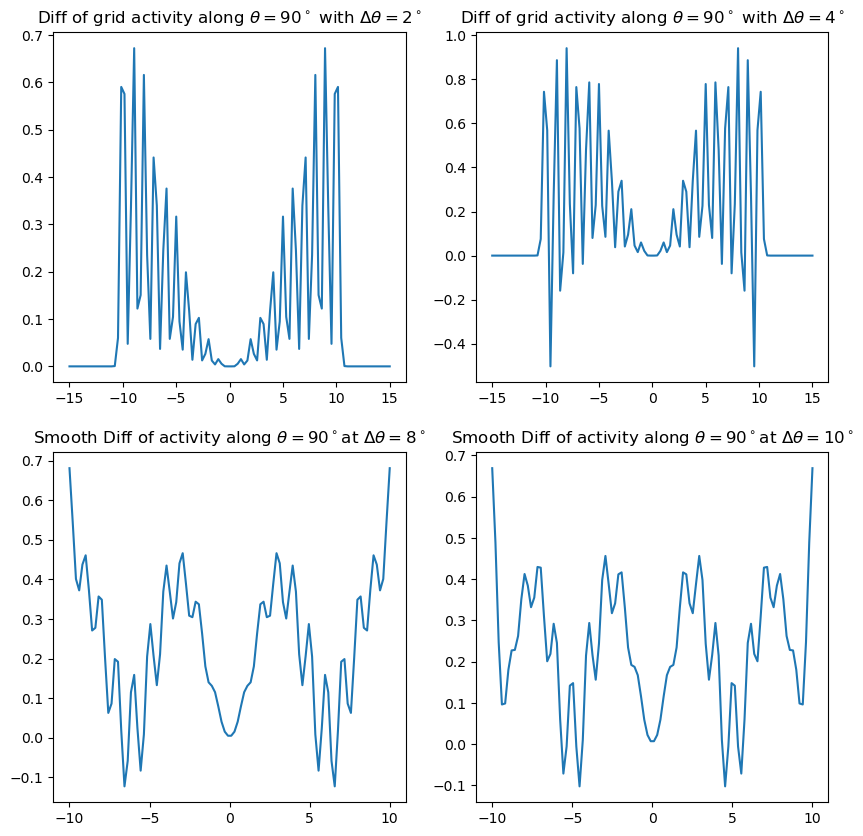

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
angle = 90
show_theta_var(angle,10, ax[0,0])
show_theta_var(angle,3, ax[0,1])
show_theta_var_conv(angle,10, ax[1,0])
show_theta_var_conv(angle,3, ax[1,1])
plt.show()

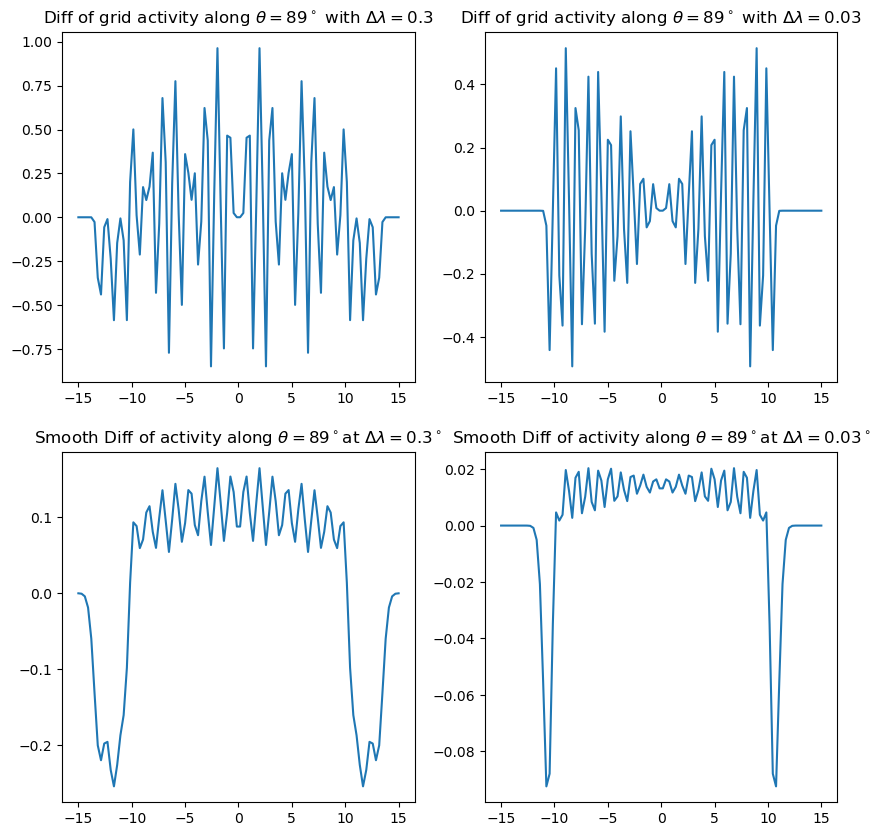

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
angle = 89
show_dist_var(angle,0.3, ax[0,0])
show_dist_var(angle,0.03, ax[0,1])
show_dist_var_conv(angle,0.3, ax[1,0])
show_dist_var_conv(angle,0.03, ax[1,1])
plt.show()

### Animation

## Metric of monotonicity

In [48]:
def monometric_theta(t=0, dt=0, ax=0):
    l = 1
    r = np.arange(-10,10,l)
    theta = np.radians(t)
    x = r*np.cos(theta)
    y = r*np.sin(theta)

    X1,Y1 = Lattice(l=1,t0=0,N=10)
    X2,Y2 = Lattice(l=1,t0=dt,N=10)
    # X3,Y3 = Lattice(l=1,t0=10,N=10)

    Z1 = GaussLattice(x,y,X1,Y1,s=0.2)
    Z2 = GaussLattice(x,y,X2,Y2,s=0.2)

    if ax!=0:
        ax.scatter(r,Z1-Z2)
        ax.set_title(r"along $\theta=$" +f"{t}" +r"$^\circ$ with $\Delta\theta=$" +f"{dt}" +r"$^\circ$")
    else:
        plt.scatter(r,Z1-Z2)
        plt.title(r"along $\theta=$" +f"{t}" +r"$^\circ$ with $\Delta\theta=$" +f"{dt}" +r"$^\circ$")

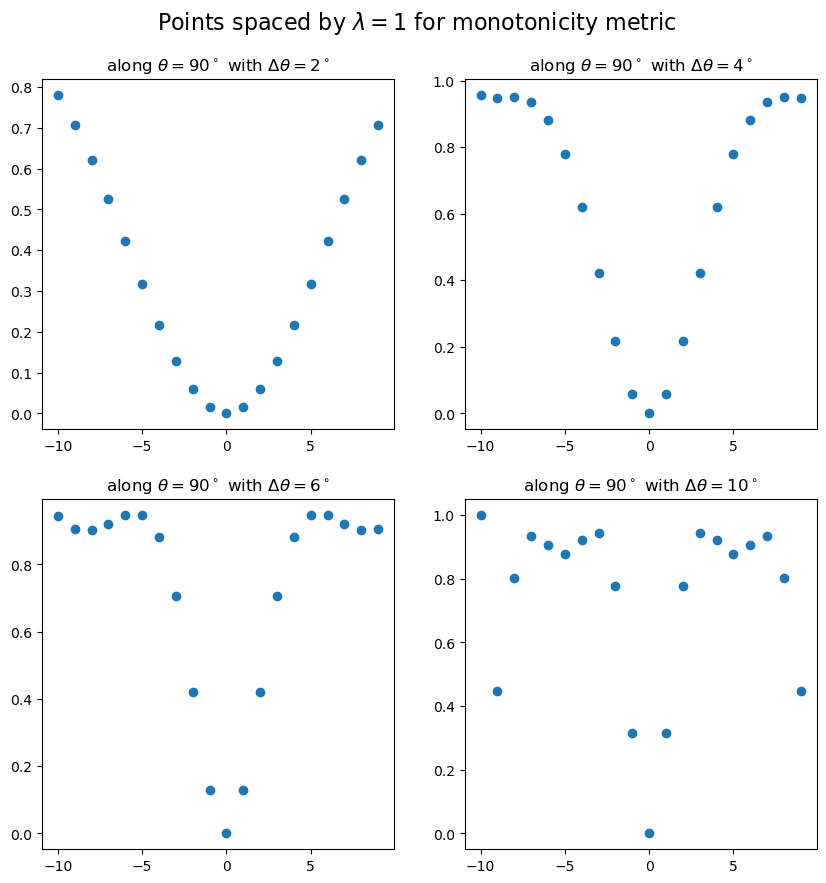

In [69]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
fig.tight_layout = True
fig.suptitle(r"Points spaced by $\lambda=1$ for monotonicity metric", size=16, y=0.95)
fig.subplots_adjust(top=0.88)

monometric_theta(90, 2, ax[0,0]) 
monometric_theta(90, 4, ax[0,1]) 
monometric_theta(90, 6, ax[1,0]) 
monometric_theta(90, 10, ax[1,1]) 

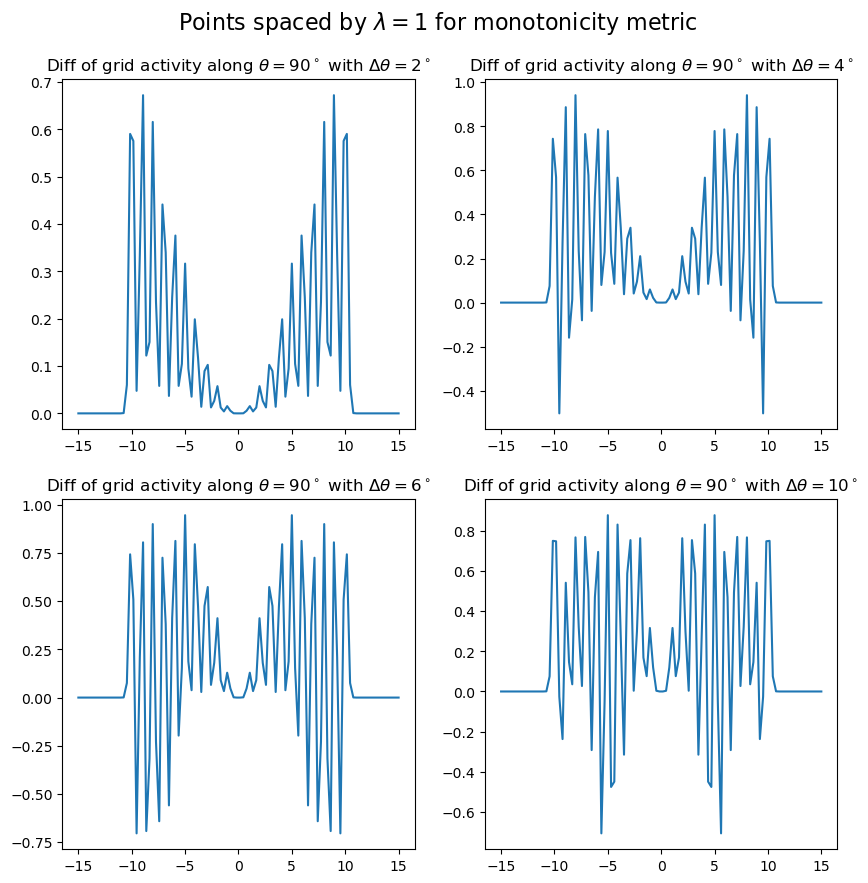

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
fig.tight_layout = True
fig.suptitle(r"Points spaced by $\lambda=1$ for monotonicity metric", size=16, y=0.95)
fig.subplots_adjust(top=0.88)

show_theta_var(90, 2, ax[0,0]) 
show_theta_var(90, 4, ax[0,1]) 
show_theta_var(90, 6, ax[1,0]) 
show_theta_var(90, 10, ax[1,1]) 